NameError: name 't' is not defined

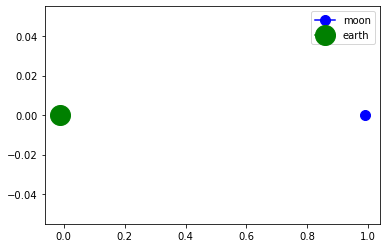

In [1]:
# Please, this is what I want you to help me debug
import numpy as np
import matplotlib.pyplot as plt

v = 2.01346544
X = [0.944, 0.0, 0.0, v]
tol = 1e-16

mu = 0.01215400111
x1 = -mu
x2 = 1-mu

plt.plot(x2, 0,  marker='o', markersize=10, color='blue', label='moon')
plt.plot(x1, 0, marker='o', markersize=20, color='green', label='earth')
plt.legend()
# plt.hold(True)

while(t<=20):
    k1 = h*sat(X)
    k2 = h*sat(X + k1/3)
    k3 = h*sat(X + k1/6 + k2/6)
    k4 = h*sat(X + k1/8 + 3*k3/8)
    k5 = h*sat(X + k1/2 - 3*k3/2 - 2*k4 )
    
    xn = X + k1/6 + 2*k4/3 + k5/6
    yn = X + k1/2 - 3*k3/2 + 2*k4
    
    K = max(abs(xn - yn))
    
    if(K<=tol):
        X = yn
        
        figure(1);
        plot(X(1), X(2), 'r')
#         plt.hold(True)
        
        t = t + h
        h = h*(tol/K)**(1/6)
        
    else:
        h = h*(tol/K)**(1/6)

def sat(X):
    mu = 0.012277471
    re = sqrt((X[0] + mu)**2 + X[1]**2)
    rm = sqrt((X[0] - 1 + mu)^2 + X[1]**2)
    f = np.zeros(4)
    f[0] = X[2]
    f[1] = X[3]
    f[2] = X[0] + 2*X[3] - (1 - mu)*(X[0] + mu)/re**3 - mu*(X[0] - 1 + mu)/rm**3
    f[3] = X[1] - 2*X[2] - (1 - mu)*X[1]/re**3 - mu*X[1]/rm**3
    
    return f
    